# Read films, plot using various matplotlib cmap options
####    Faxitron Xray  //  MPM Industries Structurix DTE film  //  Kodak D19, Indicator Stop, Rapid Fixer 

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import tifffile

# read image from file
img = mpimg.imread('../data/input_xray_image.png')

# img from scanner has 3 channels (r-g-b), all with equal value.
# subset one channel for single-value color mapping
img=img[:, :, 0]

## visualize scan in various colormaps

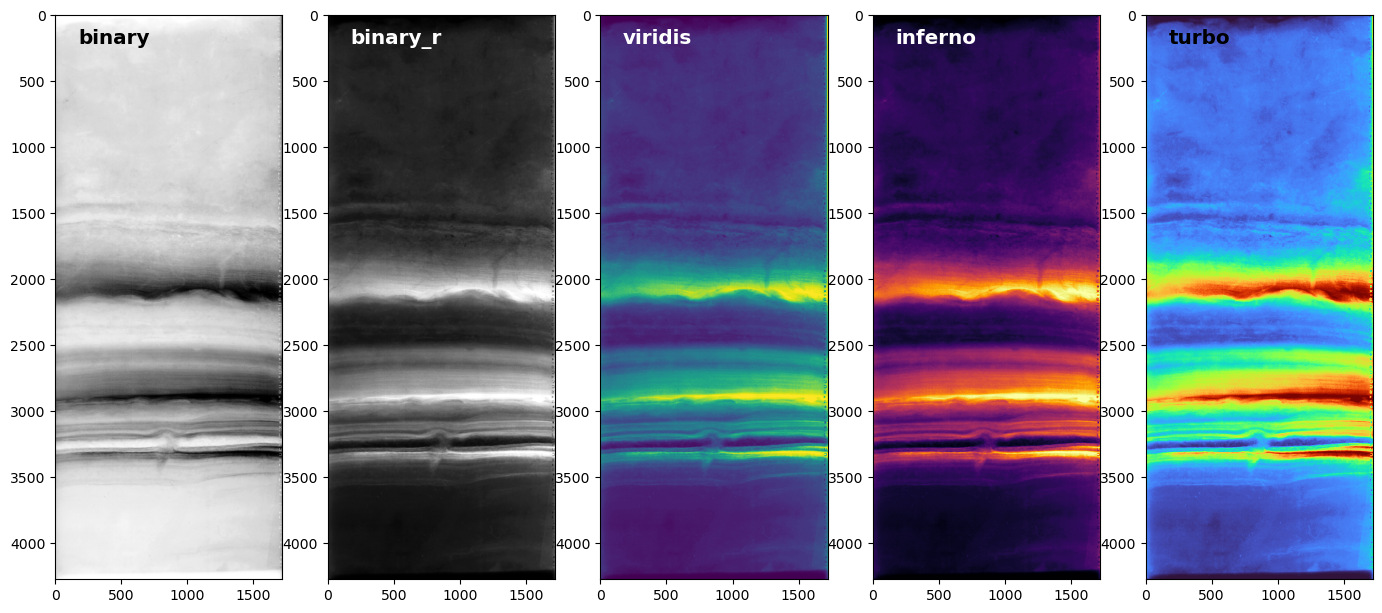

In [6]:
# plot
fig, axs = plt.subplots(1,5,figsize=(17,17))
axs[0].imshow(img, cmap='binary')
axs[1].imshow(img, cmap='binary_r')
axs[2].imshow(img, cmap='viridis')
axs[3].imshow(img, cmap='inferno')
axs[4].imshow(img, cmap='turbo')

# labels
axs[0].text(.1, .95, 'binary', transform=axs[0].transAxes, 
            fontsize='x-large',fontweight='heavy',color='k')
axs[1].text(.1, .95, 'binary_r', transform=axs[1].transAxes, 
            fontsize='x-large',fontweight='heavy',color='w')
axs[2].text(.1, .95, 'viridis', transform=axs[2].transAxes, 
            fontsize='x-large',fontweight='heavy',color='w')
axs[3].text(.1, .95, 'inferno', transform=axs[3].transAxes, 
            fontsize='x-large',fontweight='heavy',color='w')
axs[4].text(.1, .95, 'turbo', transform=axs[4].transAxes, 
            fontsize='x-large',fontweight='heavy',color='k')

plt.show()

## Apply adjustments: rescale_intensity, adaptive histogram equalization, unmask sharpening

C:\Users\lahre\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,
C:\Users\lahre\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3505: UserWarning: Possible precision loss converting image of type float32 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


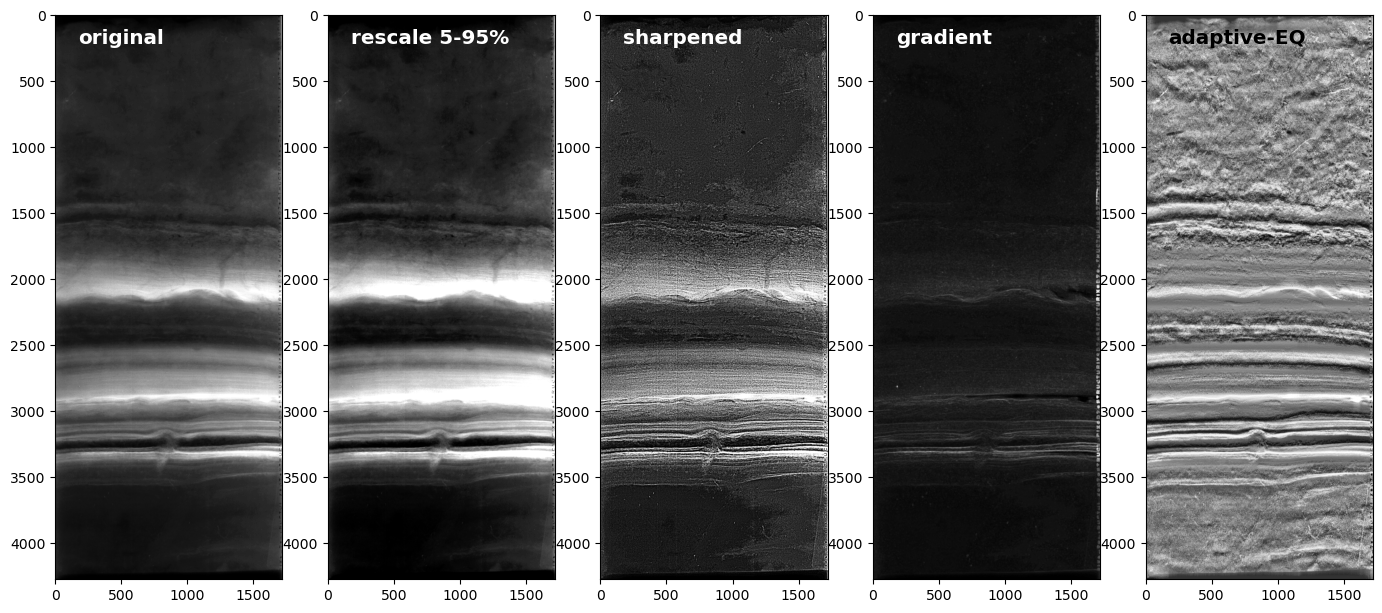

In [7]:
from skimage.morphology import disk
import skimage.exposure as exposure
from skimage.filters.rank import gradient
from skimage.filters import unsharp_mask

# percentile contrast stretch
p5, p95 = np.percentile(img, (5, 95))
img_rescale = exposure.rescale_intensity(img, in_range=(p5, p95))
# adaptive equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.2, kernel_size=[100,5])
# intensity Gradient
img_gradient = gradient(img, disk(5))
# sharpen
img_sharp = unsharp_mask(img, radius=5, amount=15)


#plot
fig, axs = plt.subplots(1,5,figsize=(17,17))
axs[0].imshow(img,         cmap='binary_r')
axs[1].imshow(img_rescale, cmap='binary_r')
axs[2].imshow(img_sharp,   cmap='binary_r')
axs[3].imshow(img_gradient,cmap='binary_r')
axs[4].imshow(img_adapteq, cmap='binary_r')
#labels
axs[0].text(.1, .95, 'original', transform=axs[0].transAxes, 
            fontsize='x-large',fontweight='heavy',color='w')
axs[1].text(.1, .95, 'rescale 5-95%', transform=axs[1].transAxes, 
            fontsize='x-large',fontweight='heavy',color='w')
axs[2].text(.1, .95, 'sharpened', transform=axs[2].transAxes, 
            fontsize='x-large',fontweight='heavy',color='w')
axs[3].text(.1, .95, 'gradient', transform=axs[3].transAxes, 
            fontsize='x-large',fontweight='heavy',color='w')
axs[4].text(.1, .95, 'adaptive-EQ', transform=axs[4].transAxes, 
            fontsize='x-large',fontweight='heavy',color='k')
plt.show()

## Write image directly to .png file with chosen cmap

In [8]:
plt.imsave('../output/output.png', img_adapteq, cmap = 'turbo')